# Part 1: Images are Arrays
----------
### Slides covering the array structure of digital images
----------

## 2-D color images

In [1]:
# The first thing we need to do is import the right packages for dealing with image files
import matplotlib
import numpy as np
from skimage import data, io

/anaconda3/envs/ImPyClass/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/envs/ImPyClass/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


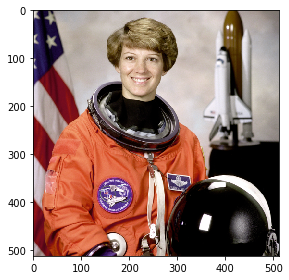

In [2]:
# scikit-image comes with some example data. Lets load some 
image = data.astronaut()
io.imshow(image);

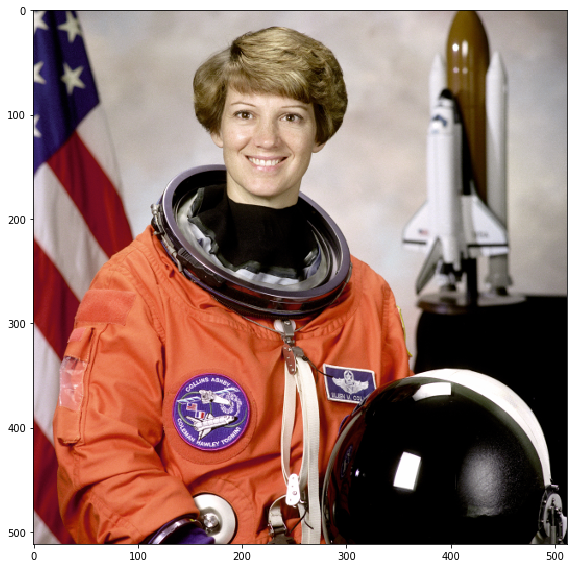

In [3]:
# This following line will change how large of an image io.imshow() makes
matplotlib.rcParams['figure.figsize'] = [8, 8]
io.imshow(image);

In [4]:
# so what type of data is "image"?
type(image)

numpy.ndarray

### Read all about numpy.ndarrays [here](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)

In [5]:
# Python will show you a snippet of the array if you just call it
# But this is not terribly useful
image

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [6]:
# check some of the attributes of our numpy.ndarray

# dimensions
image.ndim

3

In [7]:
# size of each dimension (why does this image have three dimensions?)
image.shape

(512, 512, 3)

In [8]:
# type of data
image.dtype

dtype('uint8')

In [9]:
# you can also use numpy.ndarray methods
flat_image = image.flatten() #what does this do?
flat_image.shape

(786432,)

In [10]:
# you can use indexing to select just parts of the array
face = image[0:200, 150:300, 0]
face.shape

(200, 150)

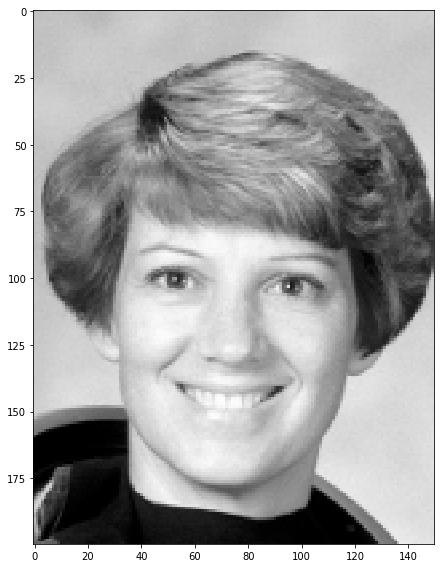

In [11]:
# lets take a look at the cropped image using io.imshow()
io.imshow(face);

     Normal shape:  (200, 150)
 Transposed shape:  (150, 200)


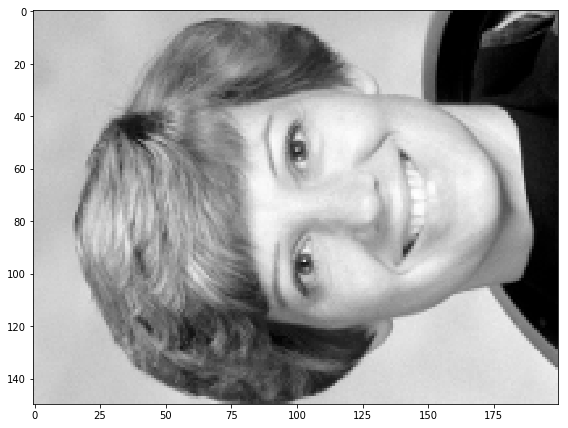

In [14]:
# Arrays have the 'T' attribute, which is the transposed data
# transposed = order of axes flipped
print('     Normal shape: ', face.shape)
print(' Transposed shape: ', face.T.shape)
io.imshow(face.T);

In [12]:
# very small arrays are a little easier to visualize as images
eye = face[97:105, 49:59]
eye

array([[105, 102,  96, 106, 101, 103, 124, 137, 152, 156],
       [ 92,  75,  51,  57,  61,  63,  76,  90, 116, 147],
       [149,  80,  59,  71,  57,  41,  53,  79, 115, 135],
       [176,  81,  69, 146, 161,  42,  58, 100, 120, 187],
       [174,  83,  85, 116, 107,  35,  85, 186, 159, 207],
       [200,  96,  84,  72,  61,  62,  96, 134, 157, 234],
       [201, 149, 107, 103,  92,  98,  97, 118, 186, 224],
       [192, 186, 180, 183, 161, 142, 148, 167, 198, 197]], dtype=uint8)

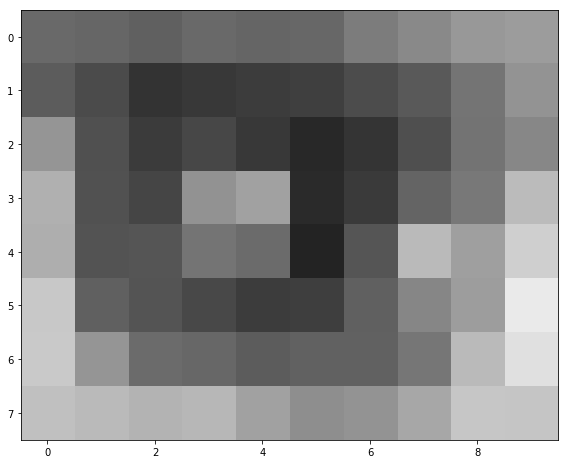

In [13]:
# compare the image with the array above
io.imshow(eye);

In [14]:
# we can easily perform math on our numpy.ndarray
eye - 34

array([[ 71,  68,  62,  72,  67,  69,  90, 103, 118, 122],
       [ 58,  41,  17,  23,  27,  29,  42,  56,  82, 113],
       [115,  46,  25,  37,  23,   7,  19,  45,  81, 101],
       [142,  47,  35, 112, 127,   8,  24,  66,  86, 153],
       [140,  49,  51,  82,  73,   1,  51, 152, 125, 173],
       [166,  62,  50,  38,  27,  28,  62, 100, 123, 200],
       [167, 115,  73,  69,  58,  64,  63,  84, 152, 190],
       [158, 152, 146, 149, 127, 108, 114, 133, 164, 163]], dtype=uint8)

In [15]:
# What happens if an operation takes a pixel below zero
#when the range of possible values is only 0-255?
eye - 36

array([[ 69,  66,  60,  70,  65,  67,  88, 101, 116, 120],
       [ 56,  39,  15,  21,  25,  27,  40,  54,  80, 111],
       [113,  44,  23,  35,  21,   5,  17,  43,  79,  99],
       [140,  45,  33, 110, 125,   6,  22,  64,  84, 151],
       [138,  47,  49,  80,  71, 255,  49, 150, 123, 171],
       [164,  60,  48,  36,  25,  26,  60,  98, 121, 198],
       [165, 113,  71,  67,  56,  62,  61,  82, 150, 188],
       [156, 150, 144, 147, 125, 106, 112, 131, 162, 161]], dtype=uint8)

# Exercises

1. Display a cropped color image of the astronaut's* face.
2. Display a cropped color image of the model space shuttle in the image.
3. Display each color channel of image\[0:200, 0:100\] in grayscale.
    - Which channel is red?
    - Which channel is blue?
    - Which channel is green?

*Retired astronaut Colonel Eileen Collins, the first woman to pilot and command the Space Shuttle

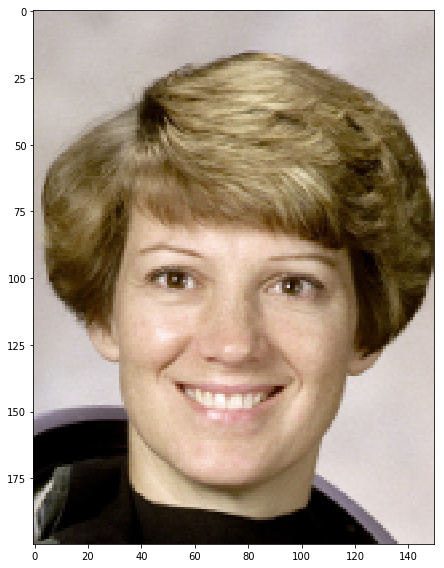

In [16]:
io.imshow(image[0:200, 150:300, :]);

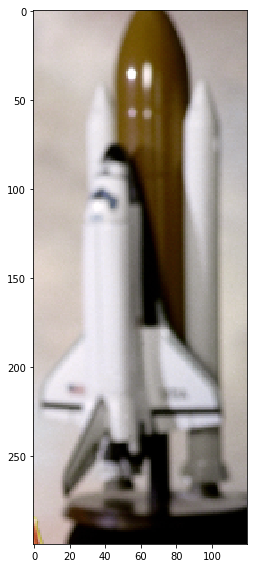

In [17]:
io.imshow(image[0:300, 350:470, :]);

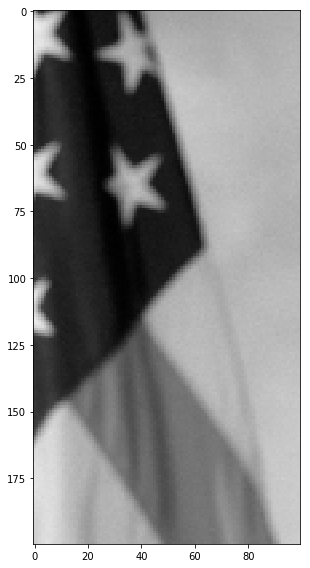

In [18]:
# this is red; notice the stripe is lighter than in the other channels
io.imshow(image[0:200, 0:100, 0]); 

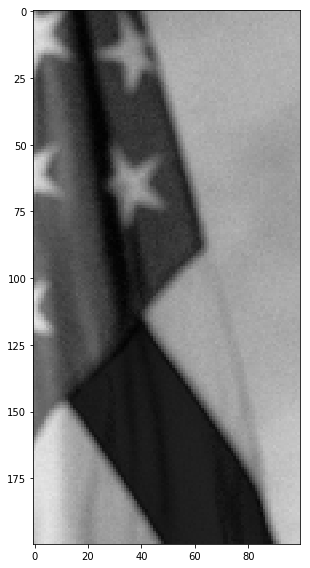

In [19]:
#this is blue, notice the the lightness of the blue field compared to the other channels
io.imshow(image[0:200, 0:100, 2]); 

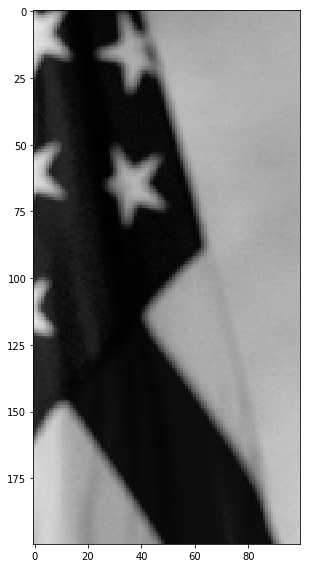

In [20]:
#this has to be green
io.imshow(image[0:200, 0:100, 1]); 

## 3-D images

In [21]:
# Now lets create an image volume of 2x3x4 'voxels' (like pixels, but volume)
# Remember the 4th dimension is color!
# So we start with an empty array of 4 dimensions, where the 4th dimension gets our color (RGB) information
cube = np.zeros([2,3,4,3], dtype='uint8')
cube.shape

(2, 3, 4, 3)

In [22]:
# Now lets set some pixels in our cube
cube[0,0,0,0] = 255 #red
cube[1,1,1,1] = 255 #green
cube[1,2,2,2] = 255 #blue
cube[0,2,3,:] = 255 #white

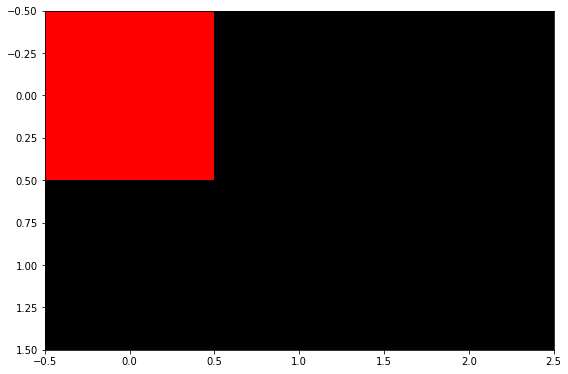

In [23]:
# We need to visualize this one plane at a time, because this is a 3-D image and our screen is 2-D!
io.imshow(cube[:,:,0,:]);

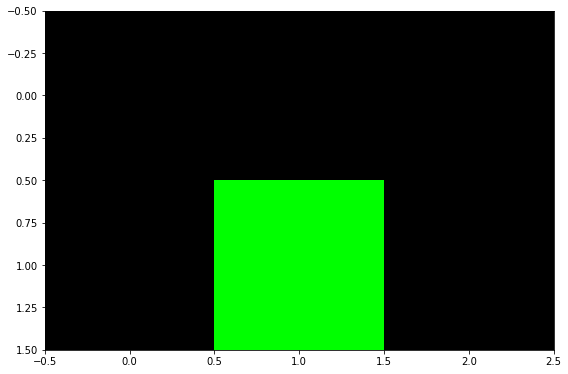

In [24]:
io.imshow(cube[:,:,1,:]);

/anaconda3/envs/ImPyClass/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


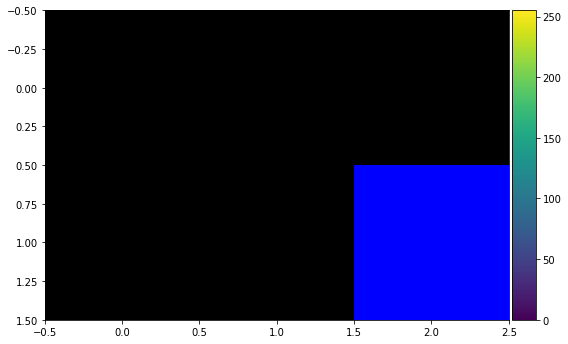

In [25]:
io.imshow(cube[:,:,2,:]);

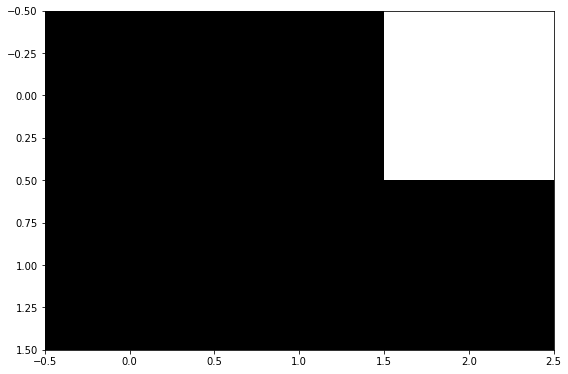

In [26]:
io.imshow(cube[:,:,3,:]);

-----------
### Explore what this looks like in 3-D space using FIJI
-----------

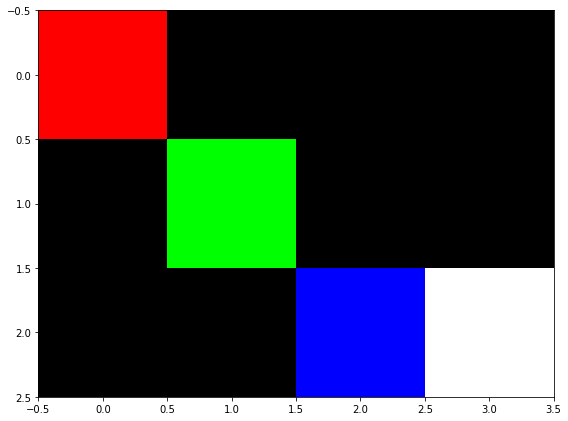

In [27]:
# If we take the maximum value along an axis, we can can view a "projection" of the volume
io.imshow(cube.max(axis=0));

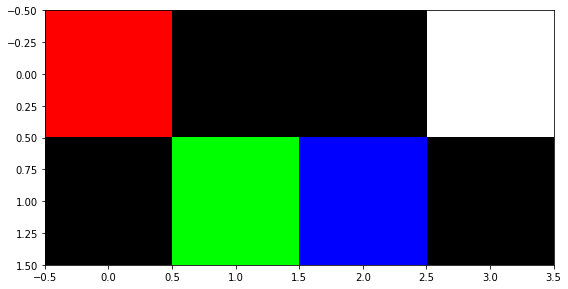

In [28]:
io.imshow(cube.max(axis=1));

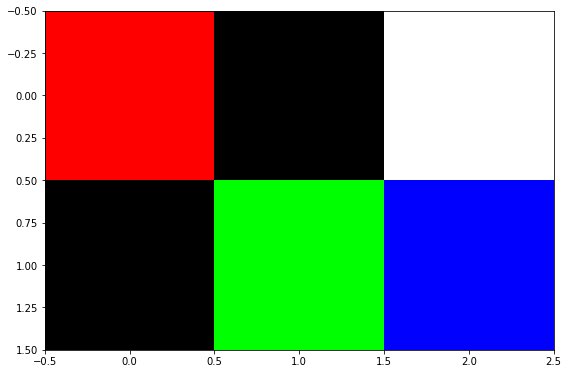

In [29]:
io.imshow(cube.max(axis=2));